In [1]:
import tensorflow as tf
from donkey import Donkey
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_eval_tfrecords_file = '../data/test.tfrecords'
batch_size = 16

In [3]:
images, labels = Donkey.build_batch(path_to_eval_tfrecords_file, batch_size=batch_size, one_hot=False, shuffled=False)
logits = Model.inference(images, keep_prob=1)
predictions = tf.argmax(logits, axis=1)

In [4]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

In [5]:
restorer = tf.train.Saver()
path_to_checkpoint = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, path_to_checkpoint)

In [6]:
predictions_val, images_val, labels_val = sess.run([predictions, images, labels])

3
3


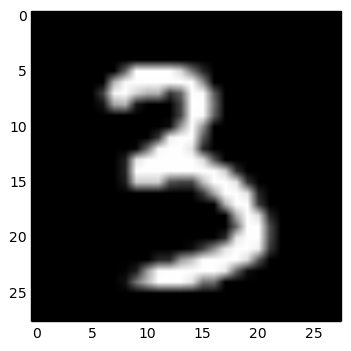

In [11]:
idx = 0
imshow(images_val[idx].reshape(28, 28), cmap='gray')
print labels_val[idx]
print predictions_val[idx]

In [12]:
coord.request_stop()
coord.join(threads)
sess.close()